In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [45]:
data = open('/content/poems.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
print(total_words)


2691


In [44]:
len(tokenizer.word_index)

2690

In [46]:
corpus[0]

'come all ye maidens young and fair'

In [47]:
tokenizer.texts_to_sequences([corpus[0]])[0]

[51, 12, 99, 1311, 48, 2, 70]

In [48]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)



In [50]:
len(input_sequences)

12038

In [51]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label

# here for every sequence in the input sequence X is all but last token and Y is last token, in this way we can predict the next word in the given input sequence
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

#OHE for last word, example in sequence [4, 2, 66, 8, 67, 68, 69, 70], X is [4, 2, 66, 8, 67, 68, 69] Y is [70]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [52]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
69
6
583
39
1218
1219


In [53]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [54]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [55]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   99 1311   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [56]:
 model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
377/377 [==============================] - 3s 9ms/step - loss: 6.6344 - accuracy: 0.0752
Epoch 2/100
377/377 [==============================] - 3s 9ms/step - loss: 5.7472 - accuracy: 0.1138
Epoch 3/100
377/377 [==============================] - 3s 9ms/step - loss: 4.8924 - accuracy: 0.1587
Epoch 4/100
377/377 [==============================] - 3s 9ms/step - loss: 3.9698 - accuracy: 0.2358
Epoch 5/100
377/377 [==============================] - 3s 9ms/step - loss: 3.1054 - accuracy: 0.3393
Epoch 6/100
377/377 [==============================] - 3s 9ms/step - loss: 2.4161 - accuracy: 0.4539
Epoch 7/100
377/377 [==============================] - 3s 9ms/step - loss: 1.9217 - accuracy: 0.5466
Epoch 8/100
377/377 [==============================] - 3s 9ms/step - loss: 1.5857 - accuracy: 0.6179
Epoch 9/100
377/377 [==============================] - 3s 9ms/step - loss: 1.3260 - accuracy: 0.6782
Epoch 10/100
377/377 [==============================] - 3s 9ms/step - loss: 1.1198 - accura

In [57]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

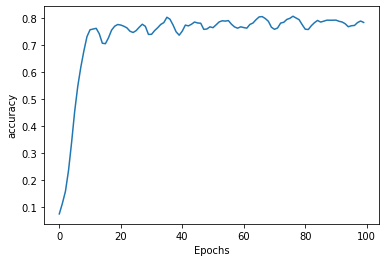

In [58]:
plot_graphs(history, 'accuracy')


In [59]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this daylight the bed is free troubles to your eyes gone alas is wouldst gone by rocky gone on sea and sea holds my hear a her gear gone her on my barley on your gone and rocky gone and gone and i hear someone tapping gone and i love gone and white with love gone the gone where high side i love i love gone gone without train i gone gone alas gone and i was walking gone and gone and then i love a gone her gone and gone her gear gone and gone and then gone alas gone


In [60]:
# the bigger the input text better is our text generation

seed_text = "I've got a bad feeling about this"
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
predicted=np.argmax(model.predict([token_list]), axis=-1)
print (predicted)

[1082]


In [61]:
for word, index in tokenizer.word_index.items():
		if index == predicted[0]:
			print (word)

daylight


In [1]:
# here we see as the number of words increase the embedding matrix increases in size, so instead of words char text generation is better wrt to computation